In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import pandas as pd
from pandas_profiling import ProfileReport
import statistics
import seaborn as sns
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             median_absolute_error,
                             max_error, make_scorer
                            )
from sklearn.metrics import PredictionErrorDisplay
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score,validation_curve,learning_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/ISE 2/Machine Learning/train.csv")

# I Nettoyage des données ( Taitement de valeurs manquantes et Imputation)

In [3]:
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] =  df.loc[:, "FireplaceQu"].fillna("No")

# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] =  df.loc[:, "LotFrontage"].fillna(0)

# GarageType etc : data description says NA for garage features is "no garage" 
df.loc[:, "GarageType"] =  df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] =  df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] =  df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] =  df.loc[:, "GarageCond"].fillna("No") 
df.loc[:, "GarageYrBlt"] =  df.loc[:, "GarageYrBlt"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement" and error for id 333 and 949
df.loc[333, "BsmtFinType2"] ="Unf"
df.loc[949, "BsmtExposure"] ="Av"
df.loc[:, "BsmtQual"] =  df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] =  df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] =  df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] =  df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] =  df.loc[:, "BsmtFinType2"].fillna("No")

# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] =  df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] =  df.loc[:, "MasVnrArea"].fillna(0)

    
# Electrical : NA most likely means not available
df.loc[:, "Electrical"] = df.loc[:, "Electrical"].fillna("SBrkr")

##  Encodage des variables ordinales

In [4]:
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2,"No" : 0},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

# I Entrainement sur les données brutes

In [5]:
y = df['SalePrice']
data = df.drop(['SalePrice','Id'], axis=1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split( data, y, test_size=0.20, random_state=42)

In [7]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

  
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

### Metrique de performance

In [26]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [27]:
METRICS = [r2_score,
           mean_squared_error,
           median_absolute_error,
           max_error
          ]

In [28]:
def rmse(x,y):
    rmse= np.sqrt(mean_squared_error(x,y))
    return rmse


 # I. 1 Regression linéaire

In [11]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_lin = define_pipeline(estimator=LinearRegression,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_lin

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=None,
                                                                                 min_frequency=None,
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002BC23783D30>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

In [12]:
reg_lin.fit(X_train, y_train)
print(f"Model score - training data: {reg_lin.score(X_train, y_train)}")
print(f"Model score - test data: {reg_lin.score(X_test, y_test)}")

Model score - training data: 0.9154171066657186
Model score - test data: -2.205280064294744e+21


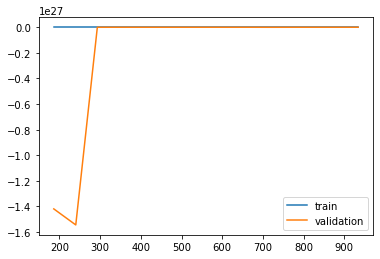

In [13]:
k,train_score, val_score= learning_curve(reg_lin,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [14]:
y_test_pred = reg_lin.predict(X_test)
y_train_pred = reg_lin.predict(X_train)

In [15]:
get_performances(real_value= y_test, estimated_value= y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,-2.205280e+21
1,mean_squared_error,1.691522e+31
2,median_absolute_error,1.368400e+04
3,max_error,7.023345e+16


In [16]:
rmse_lin=rmse(y_test, y_test_pred)
rmse_lin

4112811382904312.5

# I.2 Regression ridge

In [17]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002BC23A91970>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 RidgeCV(alpha_per_target=False, alphas=(0.1, 1.0, 10.0),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [18]:
reg_ridge.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge.score(X_test, y_test)}")

Model score - training data: 0.8870165802834767
Model score - test data: 0.8726292139827336


In [19]:
rmse_rig= rmse(y_test,reg_ridge.predict(X_test))
rmse_rig

31256.606949863606

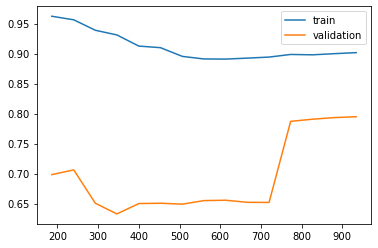

In [20]:
k,train_score, val_score= learning_curve(reg_ridge,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [21]:
k

array([186, 240, 293, 346, 400, 453, 507, 560, 613, 667, 720, 773, 827,
       880, 934])

# I.3 Random Forest

In [22]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
random = define_pipeline(estimator=RandomForestRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
random

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [23]:
random.fit(X_train, y_train)
print(f"Model score - training data: {random.score(X_train, y_train)}")
print(f"Model score - test data: {random.score(X_test, y_test)}")

Model score - training data: 0.9770131071272189
Model score - test data: 0.8895259996902699


In [24]:
rmse_rf= rmse(y_test,random.predict(X_test))
rmse_rf

29109.64822509062

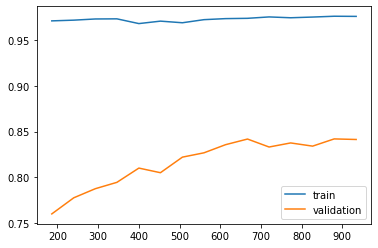

In [25]:
k,train_score, val_score= learning_curve(random,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()

# I.4 Gradient Boosting

In [26]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
GBR = define_pipeline(estimator=GradientBoostingRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
GBR

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1,
                                           loss='squared_error', max_depth=3,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           random_state=None, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False))],
         verbose=False)

In [27]:
GBR.fit(X_train, y_train)
print(f"Model score - training data: {GBR.score(X_train, y_train)}")
print(f"Model score - test data: {GBR.score(X_test, y_test)}")

Model score - training data: 0.9708317700716678
Model score - test data: 0.9078231733205575


In [28]:
rmse_GBR=rmse(y_test,GBR.predict(X_test))
rmse_GBR

26589.966705031304

In [29]:
#MODELES= [("Regression lineaire",rmse_lin),("RigeCV",rmse_rig), ("Randomforest",rmse_rf),("GradientBoosting",rmse_GBR)]

In [30]:
MODELES= [("RigeCV",rmse_rig), ("Randomforest",rmse_rf),("GradientBoosting",rmse_GBR)]

In [31]:
erreur_sans_traitement= pd.DataFrame(MODELES, columns=["MODELES","RMSE"])

In [32]:
erreur_sans_traitement

,MODELES,RMSE
0,RigeCV,31256.606950
1,Randomforest,29109.648225
2,GradientBoosting,26589.966705


<AxesSubplot:xlabel='MODELES', ylabel='RMSE'>

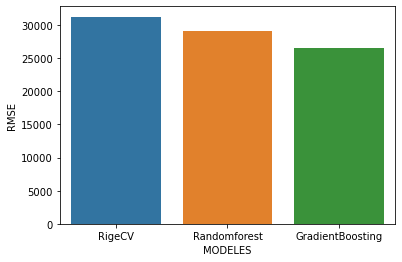

In [33]:
sns.barplot(x= 'MODELES', y= 'RMSE', data=erreur_sans_traitement)

In [34]:
MODELES_score= [("RigeCV",reg_ridge.score(X_test, y_test)), ("Randomforest",random.score(X_test, y_test)),("GradientBoosting",GBR.score(X_test, y_test))]

In [35]:
Score= pd.DataFrame(MODELES_score, columns=["MODELES_score","R2_SCORE"])
Score

,MODELES_score,R2_SCORE
0,RigeCV,0.872629
1,Randomforest,0.889526
2,GradientBoosting,0.907823


<AxesSubplot:xlabel='MODELES_score', ylabel='R2_SCORE'>

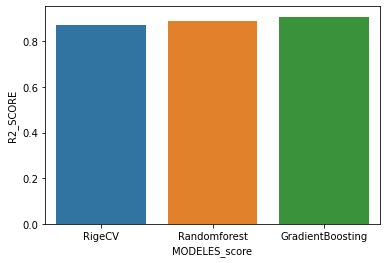

In [36]:
sns.barplot(x= 'MODELES_score', y= 'R2_SCORE', data=Score)

# II Amelioration des modeles

## features selection

Les cas de multicolinéarité décelés dans le preprocessing sont les suivantes :

- TotalBsmtSF= BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF.
- GrLivArea=1stFlrSF+2ndFlrSF+LowQualFinSF
 
 Dans le souci d'avoir des variables explicatives indépendantes et au vu de la corrélation entre ces variables et la variable à prédire, nous utiliserons uniquement les variables TotalBsmtSF,BsmtFinSF1,GrLivArea, 1stFlrSF pour la construction des modèles.

Le nombre de voiture que peut contenir un garage dépend fortement de la surface du garage comme le montre le coéfficient de corrélation (0.8) entre la variable GarageCar et GarageArea. De ce fait, nous considérerons l'une des deux variables(la variable GarageCar car ayant un coefficient de corrélation de 0.64 avecla variable à prédire) 

Les données de la variable BedroomAbvGr sont contenues dans la varaible TotRmsAbvGrd. De ce fait, seule cette dernière sera considérée.

Pour la construction du modèle, nous utiliserons les variables ayant un coefficient de corrélation supérieur ou égale à 0,3  pour les variables numériques et les variables fortement correlés (coefficient de corrélation superieur à 0,6) pour les variables catégorielles avec la variable à prédire

Les variables FullBath, BsmtFullBath  seront sommées pour former la variable TotBath : nombre total de salle de bains


## Features ingeneering

In [5]:
df=df.assign(TotBath= df[['FullBath','BsmtFullBath']].sum(axis=1))


In [6]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
df = df[df.GrLivArea < 4000]

In [7]:
train = df.drop(['SalePrice','Id'], axis=1)
y = df['SalePrice']

In [8]:
#variables= make_pipeline( SelectKBest(f_classif, k=20)

In [9]:
#X_new = variables.fit_transform(train, y)

In [10]:
X=train.drop(['RoofMatl','LandContour','LotConfig','Utilities','Street','LandSlope','Heating','Electrical','Functional',
              'PavedDrive','Condition2','Condition1', 'EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GarageArea','BedroomAbvGr','FullBath','BsmtFullBath','HalfBath',
              'BsmtHalfBath','KitchenAbvGr','YrSold','MoSold','ExterCond','BsmtExposure','PoolQC',
              'MiscFeature','Alley','FireplaceQu','BsmtFinType2', 'SaleCondition','Fence','MiscVal','LotShape',
              'RoofStyle','PoolArea','MSSubClass', 'BsmtFinType2','LotFrontage', 'LotArea',
               'OverallCond','BsmtCond','GarageCond'], axis=1)

###  Division de la base

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
        

In [12]:
categorical_features = X.select_dtypes(include="object").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = X.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object')

Numerical features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'TotBath'],
      dtype='object')


## Pipeline pour l'encodage des varables categoriques et la normalisation des variables numériques

In [13]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", RobustScaler())]
                              )

categorical_transformer = make_pipeline(*[SimpleImputer(strategy="constant", fill_value="missing"),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [14]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="mean"),
                       RobustScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]

##  Fonction pour la creation d'un estimateur composite

In [15]:
def model(estimateur):
    model = Pipeline(
        steps=[ ("preprocessor", preprocessor), ("regressor", estimateur)]
    )

    return model

In [16]:
def model_trans(estimateur):    
        model_trans= Pipeline(
            steps=[ ("preprocessor", preprocessor), ("Transformateur",TransformedTargetRegressor(
            regressor=estimateur(), func=np.log1p, inverse_func=np.expm1
        ) )]
        )
        
        return model_trans

In [17]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    
    if not parameters:
        parameters = dict()

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

In [18]:
def define_pipeline2(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )
    return Pipeline(steps=[("preprocessor", preprocessor), ("Transformateur",TransformedTargetRegressor(
            regressor=estimator(**parameters), func=np.log1p, inverse_func=np.expm1
        ) )]
        )

## Définition des fonctions pour la recuperation des variables importantes pour les modèles

In [19]:
def get_input_features1(model_pipeline, cat_step_name):
    """ Get model feature names used in training
    
    """

    all_feature_names = []

    for step_name, pipe_trans, feat_names in model_pipeline["preprocessor"].transformers_:
        if step_name == cat_step_name:
            all_feature_names.extend(pipe_trans
                                 .named_steps["onehotencoder"]
                                 .get_feature_names_out(input_features=categorical_features)
                                )
        else:
            all_feature_names.extend(feat_names)
    return all_feature_names

In [21]:
def get_input_features2(model_pipeline,estimateur, cat_step_name):
    

    all_feature_names = []

    for step_name, pipe_trans, feat_names in estimateur["preprocessor"].transformers_:
        if step_name == cat_step_name:
            all_feature_names.extend(pipe_trans
                                 .named_steps["onehotencoder"]
                                 .get_feature_names_out(input_features=categorical_features)
                                )
        else:
            all_feature_names.extend(feat_names)
    return all_feature_names

# regression lineare

In [22]:
reg_sim=model(LinearRegression())

In [23]:
reg_sim.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  Index(['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

In [24]:
y_test_pred1 = reg_sim.predict(X_test)
y_train_pred1 = reg_sim.predict(X_train)

In [29]:
get_performances(y_test,y_test_pred1,METRICS)

,metric,value
0,r2_score,8.713263e-01
1,mean_squared_error,6.753334e+08
2,median_absolute_error,1.469058e+04
3,max_error,8.253038e+04


In [30]:
rmse_lin2=rmse(y_test,y_test_pred1)
rmse_lin2

25987.178403037906

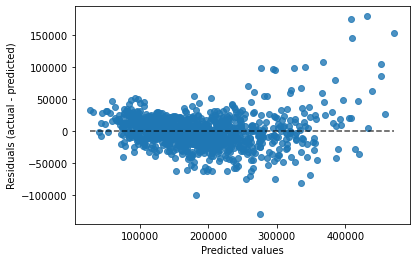

In [31]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_train_pred1)
display.plot()
plt.show()

### transformation de la variable cible

Dans l'analyse exploratoire des données, nous avons remarqué que c'est en appliquant le logarithme à la variables cible que nous avions une distribution normale des ecarts entre les valeurs. d'où l'idée d'appliquer une transformation logarithmique à la variable cible.

In [32]:
reg= model_trans(LinearRegression)


In [33]:
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression(copy_X=True,
                                                                       fit_intercept=True,
                                                                       n_jobs=None,
                                                                       positive=False),
                                            transformer=None))],
         verbose=False)

### Entrainement

In [34]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

### evaluation du modèle

In [35]:
print(f"Model score - training data: {reg.score(X_train, y_train)}")
print(f"Model score - test data: {reg.score(X_test, y_test)}")

Model score - training data: 0.9295161626903266
Model score - test data: 0.9085511512171359


In [36]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )


,metric,train,test
0,r2_score,9.295162e-01,9.085512e-01
1,mean_squared_error,4.249708e+08,4.799618e+08
2,median_absolute_error,9.852618e+03,1.133227e+04
3,max_error,1.526521e+05,8.617520e+04


In [37]:
n= X_test.shape[0]

In [38]:
def r_score_ajuste(x,y,r):
    n= X.shape[0]
    p= X.shape[1]
    r_score_ajuste = 1-(1-r)*(n-1)/(n-p-1)
    return r_score_ajuste

In [39]:
 r_score_ajuste(X_train, y_train,reg.score(X_train, y_train))

0.9279817533106918

In [40]:
 r_score_ajuste(X_test, y_test,reg.score(X_test, y_test))

0.9065603406045876

In [41]:
rmse_lin_trans=rmse(y_test,y_test_pred)
rmse_lin_trans

21908.030817946597

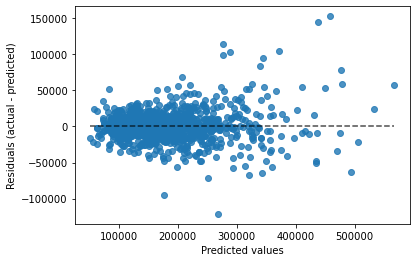

In [42]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_train_pred)
display.plot()
plt.show()

Text(0.5, 1.0, 'linear regression \n with target transformation')

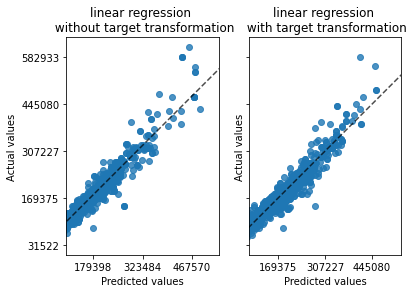

In [136]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred=y_train_pred, 
                                        kind="actual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred=y_train_pred1, 
                                        kind="actual_vs_predicted", ax=ax1)
   
ax0.set_title("linear regression \n without target transformation")
ax1.set_title("linear regression \n with target transformation")


Text(0.5, 1.0, 'Residual in linear regression \n with target transformation')

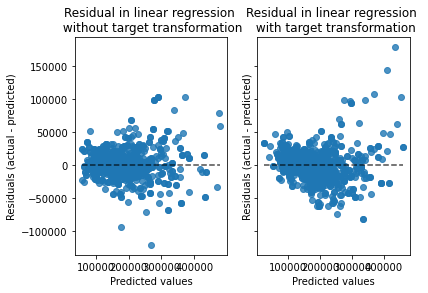

In [137]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=y_train_pred,kind="residual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=y_train_pred1,kind="residual_vs_predicted", ax=ax1)

ax0.set_title("Residual in linear regression \n without target transformation")
ax1.set_title("Residual in linear regression \n with target transformation")


### Selection du modele

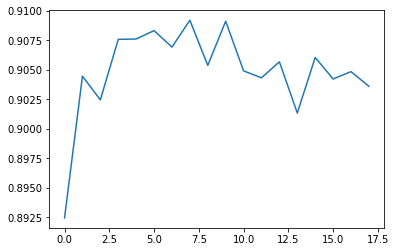

In [45]:
val_score = []
for k in range(2,20):
    scores = cross_val_score(reg,X_train, y_train, cv = k).mean()
    val_score.append(scores)
plt.plot(val_score)
    

In [46]:
scores = cross_val_score(reg,X_train, y_train, cv = 9)
result=scores.max()

In [47]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.88833814 0.91829274 0.91775748 0.91311522 0.92632598 0.91475613
 0.88208039 0.87730685 0.94478189]
Average CV Score:  0.9091949794144344
Number of CV Scores used in Average:  9


## optimisation des hyperparamètres

In [48]:
reg.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                

In [49]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median","most_frequent"],
    "preprocessor__num__scaler": [ StandardScaler(), MinMaxScaler(), RobustScaler()],
    
}

grid_search = GridSearchCV(reg, param_grid, cv=9, scoring="r2", return_train_score=True) 
grid_search

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=nan,
                                                                                                        stra...
                                                                  'median',
                                                                  'most_frequent'],
                         'preprocessor__num__scaler': [StandardScaler(copy=True,
                                                                      with_mean=True,
                                                                      with_std=True),
                                                       MinMaxScaler(clip=False,
                                                                    copy=True,
                                                                    feature_range=(0,
                                                                                   1)),
                                                       RobustScaler(copy=True,
                                                                    quantile_range=(25.0,
                                                                                    75.0),
                                                                    unit_variance=False,
                                                                    with_centering=True,
                                                                    with_scaling=True)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [50]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), unit_variance=False,
             with_centering=True, with_scaling=True)}


In [51]:
model= grid_search.best_estimator_

In [52]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('scaler'...
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression(copy_X=True,
                                                                       fit_intercept=True,
                                                                       n_jobs=None,
                                                                       positive=False),
                                            transformer=None))],
         verbose=False)

In [53]:
y_test_pred2 = model.predict(X_test)
y_train_pred2 = model.predict(X_train)

In [54]:
print(f"Model score - training data: {model.score(X_train, y_train)}")
print(f"Model score - test data: {model.score(X_test, y_test)}")

Model score - training data: 0.9295161626903266
Model score - test data: 0.9085511512171359


## variables importantes

Il s'agit des variables dont les valeurs absolues des coefficients sont les plus élevées

In [93]:
estimateur_trans = reg_sim["regressor"]

In [97]:
model_features_reg_sim= get_input_features2(model_pipeline=reg_sim,estimateur=reg_sim, cat_step_name="cat")
df_feature_importance_reg_sim = pd.DataFrame(estimateur_trans.coef_, columns=["coef"], index=model_features_reg_sim)

Text(0.5, 1.0, 'Regression linéaire')

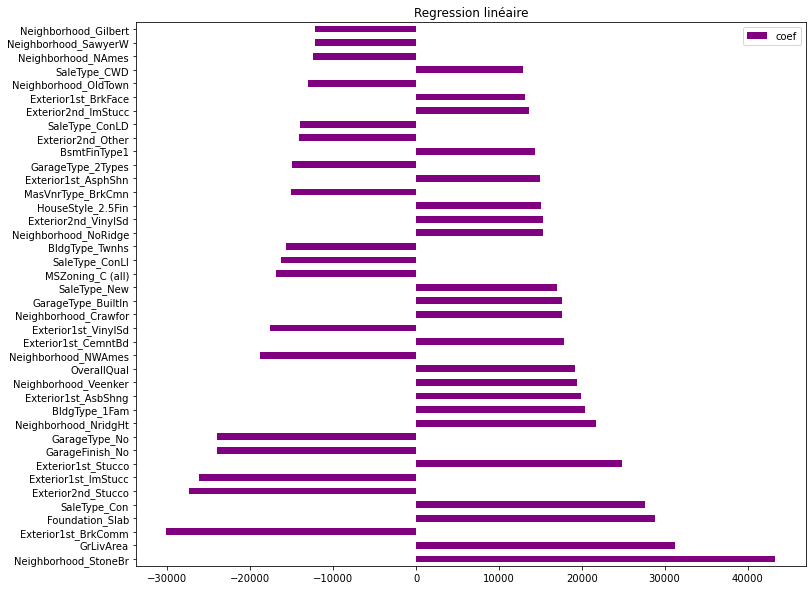

In [98]:
(df_feature_importance_reg_sim
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(40)
 .plot(kind="barh", figsize=(12, 10), color= 'purple')
)
plt.title("Regression linéaire")


In [99]:
model_features_reg = get_input_features1(model_pipeline=reg, cat_step_name="cat")

In [100]:
reg_estimator = reg["Transformateur"]
df_feature_importance_reg = pd.DataFrame(reg_estimator.regressor_.coef_, columns=["coef"], index=model_features_reg)

Text(0.5, 1.0, 'Regression linéaire avec transformateur')

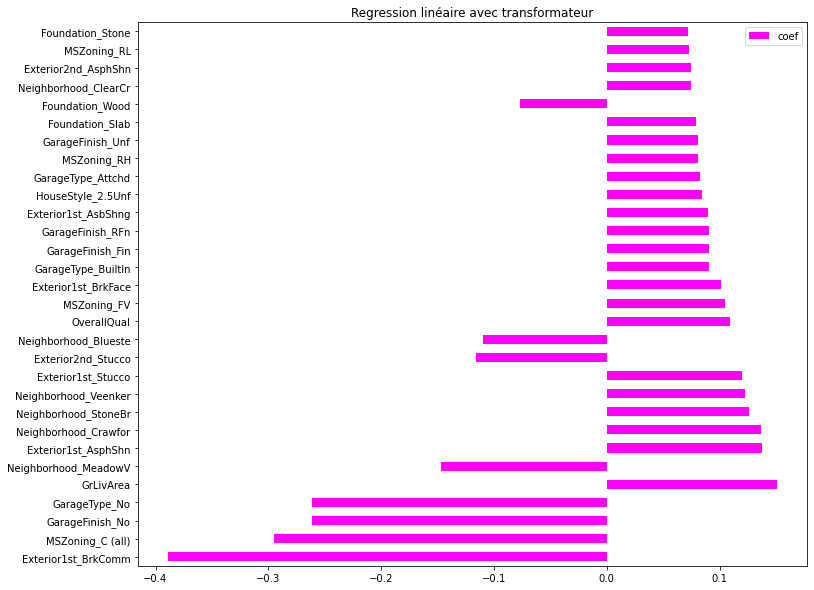

In [101]:
(df_feature_importance_reg
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10), color= 'magenta')
)
plt.title("Regression linéaire avec transformateur")


# Regression RIDGE

In [141]:
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters= {'alphas': 0.5},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                                                                 min_frequency=None,
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000214FE62F5E0>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 RidgeCV(alpha_per_target=False, alphas=0.5, cv=None,
                         fit_intercept=True, gcv_mode=None, scoring=None,
                         store_cv_values=False))],
         verbose=False)

In [142]:
reg_ridge.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge.score(X_test, y_test)}")

Model score - training data: 0.899218519619214
Model score - test data: 0.8728058088112587


In [143]:
reg_ridge_trans = define_pipeline2(estimator=RidgeCV,
                            parameters={'alphas': 0.5} ,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge_trans

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000214FE63C850>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RidgeCV(alpha_per_target=False,
                                                              alphas=0.5,
                                                              cv=None,
                                                              fit_intercept=True,
                                                              gcv_mode=None,
                                                              scoring=None,
                                                              store_cv_values=False),
                                            transformer=None))],
         verbose=False)

In [144]:
reg_ridge_trans.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge_trans.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge_trans.score(X_test, y_test)}")

Model score - training data: 0.9292289319795084
Model score - test data: 0.9086392988342983


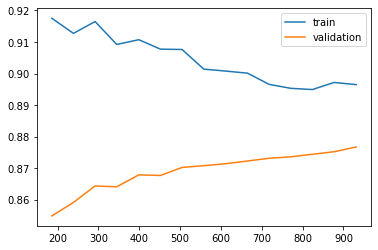

In [96]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(reg_ridge,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


Text(0.5, 1.0, 'ridge regression \n with target transformation')

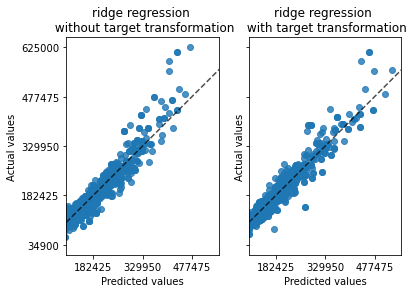

In [145]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true= y_train, y_pred= reg_ridge.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= reg_ridge_trans.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax1)
   
ax0.set_title("ridge regression \n without target transformation")
ax1.set_title("ridge regression \n with target transformation")


## Distribution du résidu

Text(0.5, 1.0, 'Residual in ridge regression \n with target transformation')

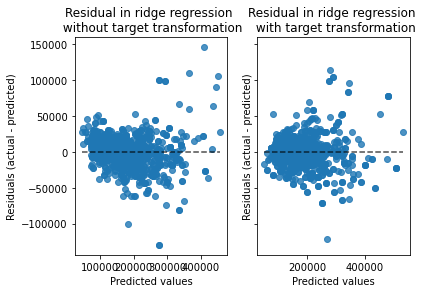

In [146]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=reg_ridge.predict(X_train),kind="residual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=reg_ridge_trans.predict(X_train),kind="residual_vs_predicted", ax=ax1)

ax0.set_title("Residual in ridge regression \n without target transformation")
ax1.set_title("Residual in ridge regression \n with target transformation")


In [108]:
# get performances in train & test
get_all_performances(value_train=(y_train, reg_ridge.predict(X_train)),
                     values_test=(y_test, reg_ridge.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,8.992185e-01,8.728058e-01
1,mean_squared_error,6.076456e+08,6.675683e+08
2,median_absolute_error,1.232929e+04,1.481302e+04
3,max_error,1.792419e+05,8.195711e+04


In [109]:
# get performances in train & test
get_all_performances(value_train=(y_train, reg_ridge_trans.predict(X_train)),
                     values_test=(y_test, reg_ridge_trans.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.292289e-01,9.086393e-01
1,mean_squared_error,4.267027e+08,4.794992e+08
2,median_absolute_error,9.957200e+03,1.113181e+04
3,max_error,1.515591e+05,8.629027e+04


In [110]:
rmse_ridge=rmse(y_test,reg_ridge.predict(X_test))
rmse_ridge

25837.343606851442

In [111]:
rmse_ridge_trans=rmse(y_test,reg_ridge_trans.predict(X_test))
rmse_ridge_trans

21897.469688307156

## Variables importantes

In [148]:
estimateur_ridge = reg_ridge["regressor"]
model_features_ridge = get_input_features2(model_pipeline=reg_ridge,estimateur=reg_ridge, cat_step_name="cat")

df_feature_importance_ridge = pd.DataFrame(estimateur_ridge.coef_, columns=["coef"], index=model_features_ridge)


Text(0.5, 1.0, 'Regression Ridge')

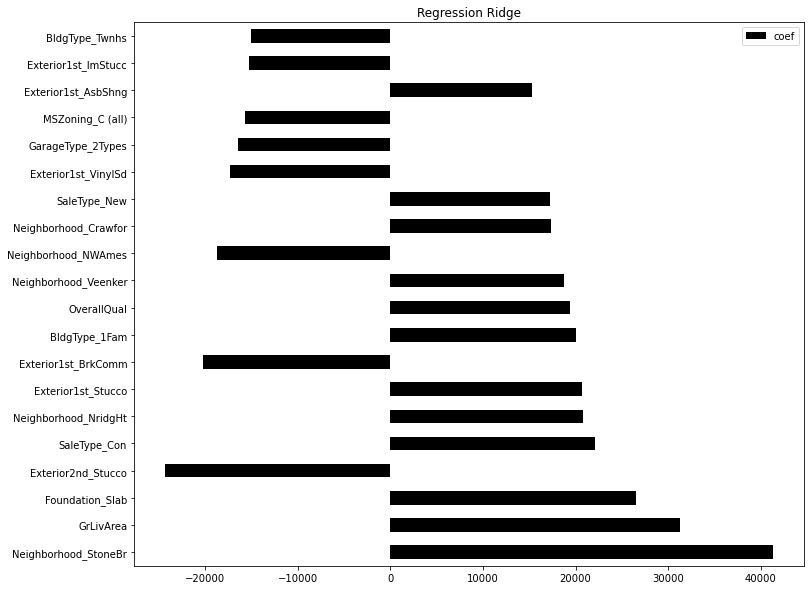

In [149]:
(df_feature_importance_ridge
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(20)
 .plot(kind="barh", figsize=(12, 10), color='black')
)
plt.title("Regression Ridge")


In [128]:
estimateur_ridge_trans = reg_ridge_trans["Transformateur"]
model_features_ridge_trans = get_input_features1(model_pipeline=reg_ridge, cat_step_name="cat")
df_feature_importance_ridge_trans = pd.DataFrame(estimateur_ridge_trans.regressor_.coef_, columns=["coef"], index=model_features_ridge_trans)

Text(0.5, 1.0, 'Regression Ridge avec transformateur')

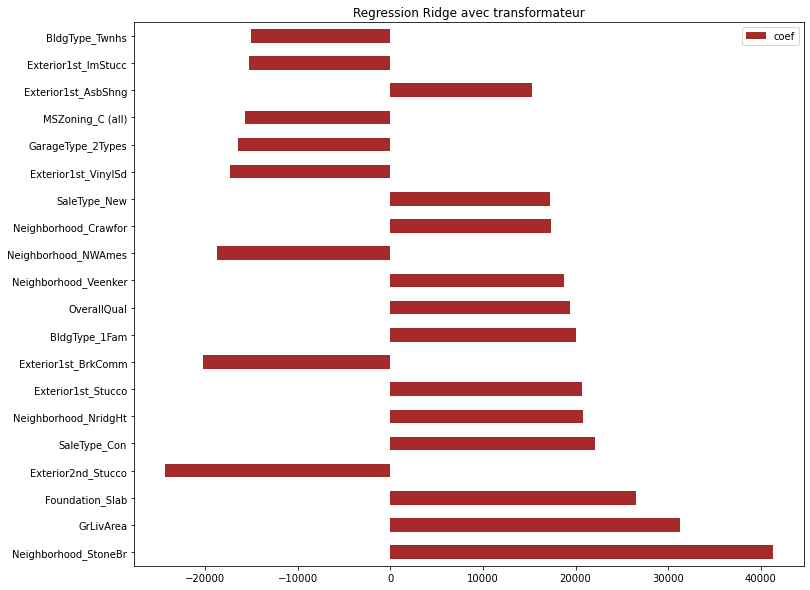

In [150]:
(df_feature_importance_ridge 
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(20)
 .plot(kind="barh", figsize=(12, 10), color= 'brown')
)
plt.title("Regression Ridge avec transformateur")
#plt.axvline(x=0, color='.6')
#plt.subplots_adjust(left=.3);

# RandomForestRegressor

Le random forest est adapté lorsqu'on a plusieurs variables explicatives. Il permet de selectionner les variables les plus importantes pour la construction du modèle. Sa force réside dans sa capacité à gérer les valeurs manquantantes et les valeurs abérrantes

In [151]:
random = define_pipeline(estimator=RandomForestRegressor,
                            parameters={'n_estimators':100},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
random

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [153]:
random.fit(X_train, y_train)
print(f"Model score - training data: {random.score(X_train, y_train)}")
print(f"Model score - test data: {random.score(X_test, y_test)}")

Model score - training data: 0.9827107404417483
Model score - test data: 0.8921887335958198


In [152]:
random_trans = define_pipeline2(estimator=RandomForestRegressor,
                            parameters={'n_estimators':100},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
random_trans

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                            regressor=RandomForestRegressor(bootstrap=True,
                                                                            ccp_alpha=0.0,
                                                                            criterion='squared_error',
                                                                            max_depth=None,
                                                                            max_features=1.0,
                                                                            max_leaf_nodes=None,
                                                                            max_samples=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_samples_leaf=1,
                                                                            min_samples_split=2,
                                                                            min_weight_fraction_leaf=0.0,
                                                                            n_estimators=100,
                                                                            n_jobs=None,
                                                                            oob_score=False,
                                                                            random_state=None,
                                                                            verbose=0,
                                                                            warm_start=False),
                                            transformer=None))],
         verbose=False)

In [154]:
random_trans.fit(X_train, y_train)
print(f"Model score - training data: {random_trans.score(X_train, y_train)}")
print(f"Model score - test data: {random_trans.score(X_test, y_test)}")

Model score - training data: 0.9805434968074092
Model score - test data: 0.8847735497994682


Text(0.5, 1.0, 'random forest \n with target transformation')

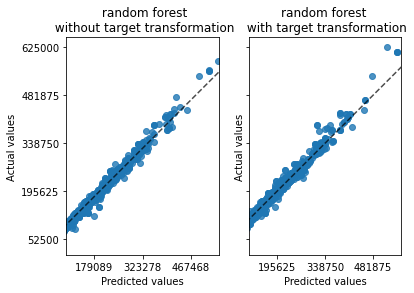

In [155]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= random.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= random_trans.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax1)
   
ax0.set_title(" random forest\n without target transformation")
ax1.set_title("random forest \n with target transformation")


Text(0.5, 1.0, 'Residual in random forest \n with target transformation')

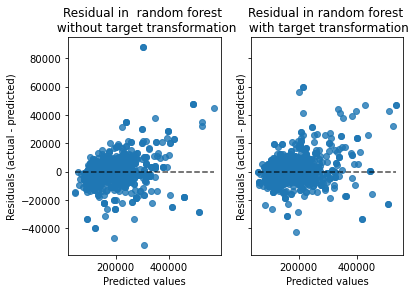

In [156]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=random.predict(X_train),kind="residual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=random_trans.predict(X_train),kind="residual_vs_predicted", ax=ax1)

ax0.set_title("Residual in  random forest \n without target transformation")
ax1.set_title("Residual in random forest \n with target transformation")


In [125]:
rmse_random=rmse(y_test,random.predict(X_test))
rmse_random

24075.65709248957

In [126]:
rmse_random_trans=rmse(y_test,random_trans.predict(X_test))
rmse_random_trans

24258.331474221595

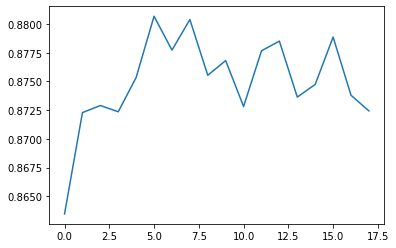

In [130]:
val_score = []
for k in range(2,20):
    scores = cross_val_score(random,X_train, y_train, cv = k).mean()
    val_score.append(scores)
plt.plot(val_score)
    

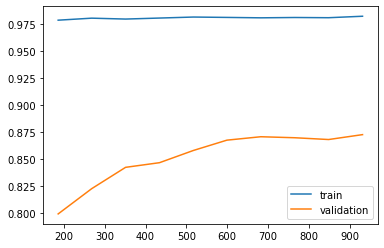

In [131]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(random,X_train, y_train,train_sizes= np.linspace(0.2,1,10), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


il semble y avoir un sur apprentissage car le modèle est très performant sur le train set et moins performant sur le validation set. ceci semble dû à l'insuffisance des données fournies et non à l'ensemble d'apprentissage.

## optimination des hyperparamètres

In [192]:
random.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
          

In [132]:
param_grid = {
     
    "regressor__n_estimators": [100,500,600,1000]
   
}

grid= GridSearchCV(random, param_grid, cv=9, scoring="r2", return_train_score=True) 

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=na...
                                                              min_impurity_decrease=0.0,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=100,
                                                              n_jobs=None,
                                                              oob_score=False,
                                                              random_state=None,
                                                              verbose=0,
                                                              warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'regressor__n_estimators': [100, 500, 600, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [133]:
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

Best params: {'regressor__n_estimators': 100}


In [200]:
random_op= grid.best_estimator_

In [201]:
random_op.fit(X_train, y_train)
print(f"Model score - training data: {random_op.score(X_train, y_train)}")
print(f"Model score - test data: {random_op.score(X_test, y_test)}")

Model score - training data: 0.9828590309578903
Model score - test data: 0.8817006087997431


In [197]:
param_grid = {
     
    "Transformateur__regressor__n_estimators": [100,500,600,1000]
   
}

grid_random_trans= GridSearchCV(random_trans, param_grid, cv=9, scoring="r2", return_train_score=True) 

In [198]:
grid_random_trans.fit(X_train, y_train)

best_params = grid_random_trans.best_params_
print(f"Best params: {best_params}")

Best params: {'Transformateur__regressor__n_estimators': 100}


In [202]:
random_trans_op=grid_random_trans.best_estimator_

In [203]:
ridge_trans_op.fit(X_train, y_train)
print(f"Model score - training data: {random_trans_op.score(X_train, y_train)}")
print(f"Model score - test data: {random_trans_op.score(X_test, y_test)}")

Model score - training data: 0.981131984333361
Model score - test data: 0.8901289414754936


In [134]:
# get performances in train & test
get_all_performances(value_train=(y_train,random.predict(X_train)),
                     values_test=(y_test, random.predict(X_test)),
                     metrics=METRICS
                    )


,metric,train,test
0,r2_score,9.833641e-01,8.895596e-01
1,mean_squared_error,1.003035e+08,5.796373e+08
2,median_absolute_error,4.072750e+03,1.144737e+04
3,max_error,6.296673e+04,9.413405e+04


In [135]:
# get performances in train & test
get_all_performances(value_train=(y_train,random_trans.predict(X_train)),
                     values_test=(y_test, random_trans.predict(X_test)),
                     metrics=METRICS
                    )


,metric,train,test
0,r2_score,9.802408e-01,8.878773e-01
1,mean_squared_error,1.191349e+08,5.884666e+08
2,median_absolute_error,4.053375e+03,1.130181e+04
3,max_error,9.208976e+04,9.924862e+04


## Variables importantes 

In [136]:
random_estimator= random["regressor"]

In [137]:
model_features_RF = get_input_features2(model_pipeline=random,estimateur=random,  cat_step_name="cat")

In [138]:
df_feature_importance_RF= pd.DataFrame(random_estimator.feature_importances_, columns=["feature_importance with Random Forest"],
                                      index=model_features_RF)

Text(0.5, 1.0, 'RANDOM FOREST')

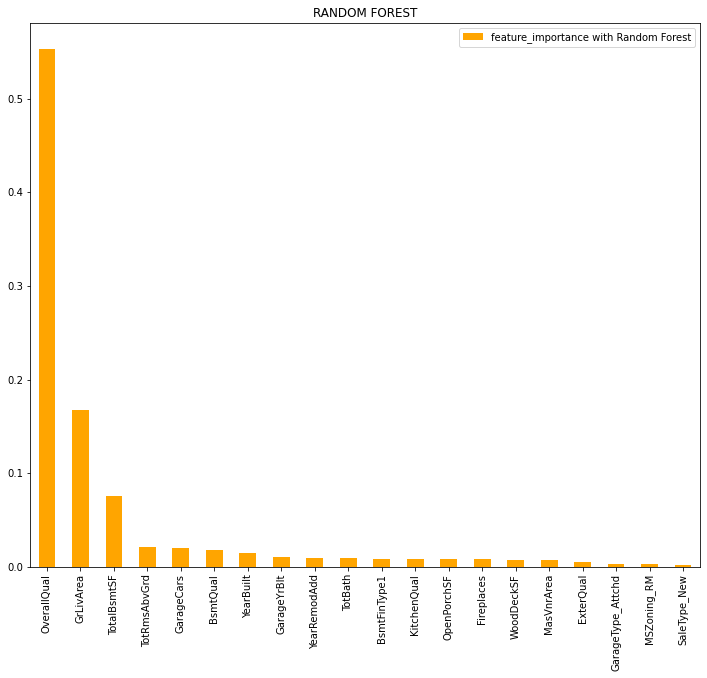

In [139]:
(df_feature_importance_RF.sort_values("feature_importance with Random Forest",key=lambda v: abs(v), ascending=False)
 .head(20)
 .plot(kind="bar", figsize=(12, 10), color='orange')
)
plt.title("RANDOM FOREST")


## Variables importantes pour le Random Forest avec transformateur

In [140]:
random_trans_estimator =random_trans["Transformateur"]

In [141]:
model_features_RF_trans = get_input_features1(model_pipeline=random_trans, cat_step_name="cat")

In [142]:
df_feature_importance_RF_trans= pd.DataFrame(model_features_RF_trans, columns=["feature_importance with Random Forest + transformateur"])

Text(0.5, 1.0, 'RANDOM_FOREST_trans')

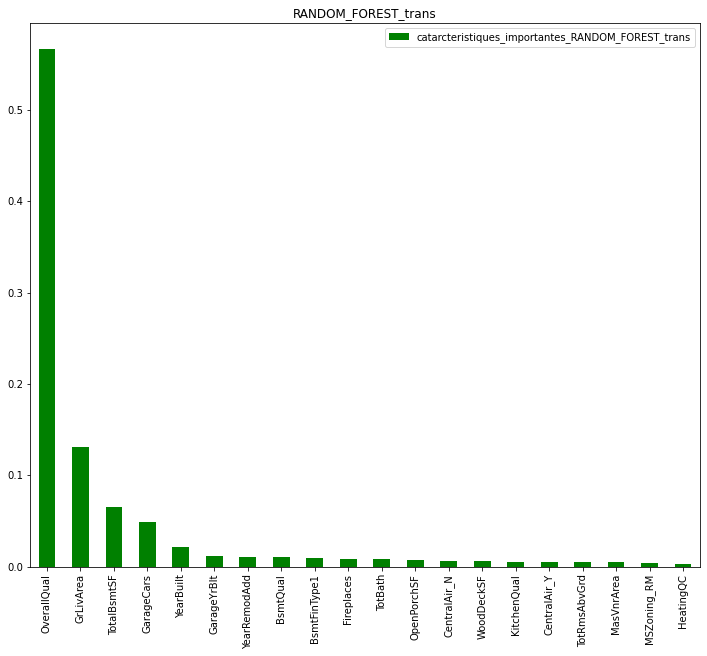

In [143]:
df_feature_importance_RF_trans = pd.DataFrame( random_trans_estimator.regressor_.feature_importances_, columns=["catarcteristiques_importantes_RANDOM_FOREST_trans"],
                                          index=model_features_RF_trans)
(df_feature_importance_RF_trans.sort_values("catarcteristiques_importantes_RANDOM_FOREST_trans",key=lambda v: abs(v), ascending=False)
 .head(20)
 .plot(kind="bar", figsize=(12, 10), color = 'green')
)
plt.title("RANDOM_FOREST_trans")

# GradientBoostingRegressor

In [59]:
GBR = define_pipeline(estimator=GradientBoostingRegressor,
                            parameters={'alpha':0.9,'n_estimators': 100, 'learning_rate': 0.1},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
GBR 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1,
                                           loss='squared_error', max_depth=3,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           random_state=None, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False))],
         verbose=False)

In [60]:
GBR.fit(X_train, y_train)
print(f"Model score - training data: {GBR.score(X_train, y_train)}")
print(f"Model score - test data: {GBR.score(X_test, y_test)}")

Model score - training data: 0.9603276750383117
Model score - test data: 0.9005068353223249


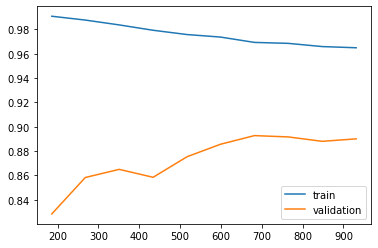

In [146]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(GBR,X_train, y_train,train_sizes= np.linspace(0.2,1,10), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()

In [147]:
y_test_pred4 = GBR.predict(X_test)
y_train_pred4 = GBR.predict(X_train)

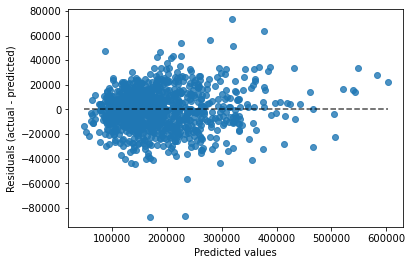

In [148]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_train_pred4)
display.plot()
plt.show()

In [61]:
GBR_trans = define_pipeline2(estimator=GradientBoostingRegressor,
                            parameters={'alpha':0.9,'n_estimators': 100, 'learning_rate': 0.1},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
GBR_trans

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                                                                learning_rate=0.1,
                                                                                loss='squared_error',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_samples_leaf=1,
                                                                                min_samples_split=2,
                                                                                min_weight_fraction_leaf=0.0,
                                                                                n_estimators=100,
                                                                                n_iter_no_change=None,
                                                                                random_state=None,
                                                                                subsample=1.0,
                                                                                tol=0.0001,
                                                                                validation_fraction=0.1,
                                                                                verbose=0,
                                                                                warm_start=False),
                                            transformer=None))],
         verbose=False)

In [62]:
GBR_trans.fit(X_train, y_train)
print(f"Model score - training data: {GBR_trans.score(X_train, y_train)}")
print(f"Model score - test data: {GBR_trans.score(X_test, y_test)}")

Model score - training data: 0.9562115686975715
Model score - test data: 0.9106212047182091


Text(0.5, 1.0, 'gradient boosting \n with target transformation')

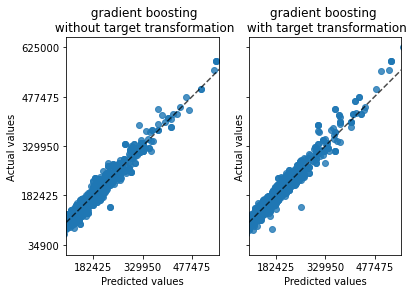

In [133]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= GBR.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= GBR_trans.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax1)
   
ax0.set_title(" gradient boosting\n without target transformation")
ax1.set_title("gradient boosting \n with target transformation")


Text(0.5, 1.0, 'Residual in gradient boosting \n with target transformation')

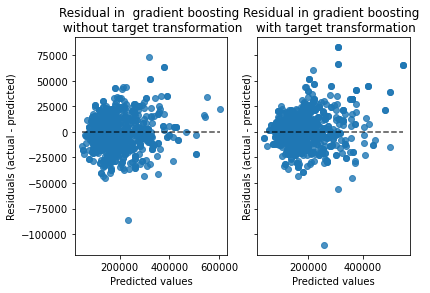

In [158]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=GBR.predict(X_train),kind="residual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=GBR_trans.predict(X_train),kind="residual_vs_predicted", ax=ax1)

ax0.set_title("Residual in  gradient boosting \n without target transformation")
ax1.set_title("Residual in gradient boosting \n with target transformation")


In [154]:
rmse_GBR=rmse(y_test,GBR.predict(X_test))
rmse_GBR

22777.47821677905

In [155]:
rmse_GBR_trans=rmse(y_test,GBR_trans.predict(X_test))
rmse_GBR_trans


21661.107555478688

In [156]:
# get performances in train & test
get_all_performances(value_train=(y_train,GBR_trans.predict(X_train)),
                     values_test=(y_test,GBR.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.562116e-01,9.011486e-01
1,mean_squared_error,2.640152e+08,5.188135e+08
2,median_absolute_error,7.948920e+03,1.223418e+04
3,max_error,1.104529e+05,1.086193e+05


In [157]:
# get performances in train & test
get_all_performances(value_train=(y_train, GBR_trans.predict(X_train)),
                     values_test=(y_test, GBR_trans.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.562116e-01,9.106010e-01
1,mean_squared_error,2.640152e+08,4.692036e+08
2,median_absolute_error,7.948920e+03,1.145245e+04
3,max_error,1.104529e+05,1.066541e+05


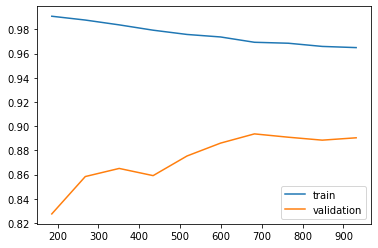

In [158]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(GBR,X_train, y_train,train_sizes= np.linspace(0.2,1,10), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [159]:
model_features = get_input_features2(model_pipeline=GBR,estimateur=GBR, cat_step_name="cat")


In [160]:
GBR_trans.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('num',
                                    Pipeline(memory=None,
                                             steps=[('simpleimputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   keep_empty_features=False,
                                                                   missing_values=nan,
                                                                   strategy='mean',
                                                                   verbose='deprecated')),
                                                    ('rob

## Optimisation des paramètres du modèle

In [64]:
param_grid = {
     "Transformateur__regressor__learning_rate": [0.1, 0.05, 0.01],
     "Transformateur__regressor__n_estimators":[50, 100, 200],
   "Transformateur__regressor__alpha":[0.1, 0.2,0.3,0.4,0.5,0.6],
 
   

   
}

grid_GBR= GridSearchCV(GBR_trans, param_grid,cv=9 ) 
grid_GBR

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=na...
                                                                                                       validation_fraction=0.1,
                                                                                                       verbose=0,
                                                                                                       warm_start=False),
                                                                   transformer=None))],
                                verbose=False),
             n_jobs=None,
             param_grid={'Transformateur__regressor__alpha': [0.1, 0.2, 0.3,
                                                              0.4, 0.5, 0.6],
                         'Transformateur__regressor__learning_rate': [0.1, 0.05,
                                                                      0.01],
                         'Transformateur__regressor__n_estimators': [50, 100,
                                                                     200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=na...
                                                                                                       validation_fraction=0.1,
                                                                                                       verbose=0,
                                                                                                       warm_start=False),
                                                                   transformer=None))],
                                verbose=False),
             n_jobs=None,
             param_grid={'Transformateur__regressor__alpha': [0.1, 0.2, 0.3,
                                                              0.4, 0.5, 0.6],
                         'Transformateur__regressor__learning_rate': [0.1, 0.05,
                                                                      0.01],
                         'Transformateur__regressor__n_estimators': [50, 100,
                                                                     200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
best_params = grid_GBR.best_params_
print(f"Best params: {best_params}")

Best params: {'Transformateur__regressor__alpha': 0.4, 'Transformateur__regressor__learning_rate': 0.05, 'Transformateur__regressor__n_estimators': 200}


In [67]:
meilleur_model= grid_GBR.best_estimator_

In [68]:
meilleur_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                                                                learning_rate=0.05,
                                                                                loss='squared_error',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_samples_leaf=1,
                                                                                min_samples_split=2,
                                                                                min_weight_fraction_leaf=0.0,
                                                                                n_estimators=200,
                                                                                n_iter_no_change=None,
                                                                                random_state=None,
                                                                                subsample=1.0,
                                                                                tol=0.0001,
                                                                                validation_fraction=0.1,
                                                                                verbose=0,
                                                                                warm_start=False),
                                            transformer=None))],
         verbose=False)

In [69]:
print(f"Model score - training data: {meilleur_model.score(X_train, y_train)}")
print(f"Model score - test data: {meilleur_model.score(X_test, y_test)}")

Model score - training data: 0.9554528121757427
Model score - test data: 0.9124645045915607


In [115]:
get_all_performances(value_train=(y_train, meilleur_model.predict(X_train)),
                     values_test=(y_test, meilleur_model.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.554528e-01,9.124645e-01
1,mean_squared_error,2.685900e+08,4.594229e+08
2,median_absolute_error,8.044438e+03,1.166311e+04
3,max_error,1.195146e+05,9.650163e+04


Text(0.5, 1.0, 'gradient boosting \n without target transformation')

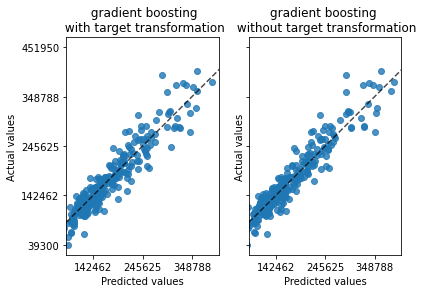

In [135]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true=y_test, y_pred= GBR.predict(X_test), 
                                        kind="actual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions( y_true=y_test, y_pred= GBR_trans.predict(X_test), 
                                        kind="actual_vs_predicted", ax=ax1)
   
ax0.set_title(" gradient boosting\n with target transformation")
ax1.set_title("gradient boosting \n without target transformation")


Text(0.5, 1.0, 'gradient boosting with target \n  transformation and best params')

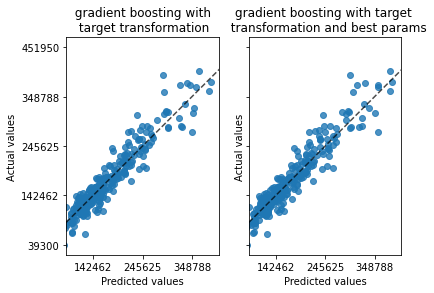

In [157]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
PredictionErrorDisplay.from_predictions( y_true=y_test, y_pred= GBR_trans.predict(X_test), 
                                        kind="actual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions( y_true=y_test, y_pred= meilleur_model.predict(X_test), 
                                        kind="actual_vs_predicted", ax=ax1)
ax0.set_title(" gradient boosting with \n target transformation")
ax1.set_title("gradient boosting with target \n  transformation and best params")

Text(0.5, 1.0, 'Residual in gradient boosting \n  with transformation and best params')

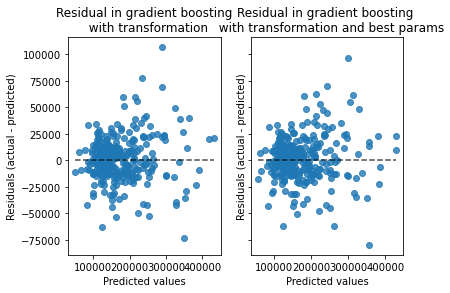

In [163]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=GBR_trans.predict(X_test),kind="residual_vs_predicted", ax=ax0)
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=meilleur_model.predict(X_test),kind="residual_vs_predicted", ax=ax1)

ax0.set_title("Residual in gradient boosting\n  with transformation")
ax1.set_title("Residual in gradient boosting \n  with transformation and best params")

## Variables importantes

In [109]:
model_features_GBR = get_input_features2(model_pipeline=GBR,estimateur=GBR, cat_step_name="cat")
model_features_GBR 

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtFinType1',
 'TotalBsmtSF',
 'HeatingQC',
 'GrLivArea',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'TotBath',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'BldgType_1

In [110]:
GBR_estimator = GBR["regressor"]

In [111]:
model_features_GBR= get_input_features2(model_pipeline=GBR,estimateur= GBR, cat_step_name="cat")

In [112]:
df_feature_importance_GDR = pd.DataFrame( GBR_estimator.feature_importances_, columns=["catarcteristiques importantes pour le GRADIENT BOOSTING"], 
                                         index=model_features_GBR)

Text(0.5, 1.0, 'Regression GRADIENT BOOSTING')

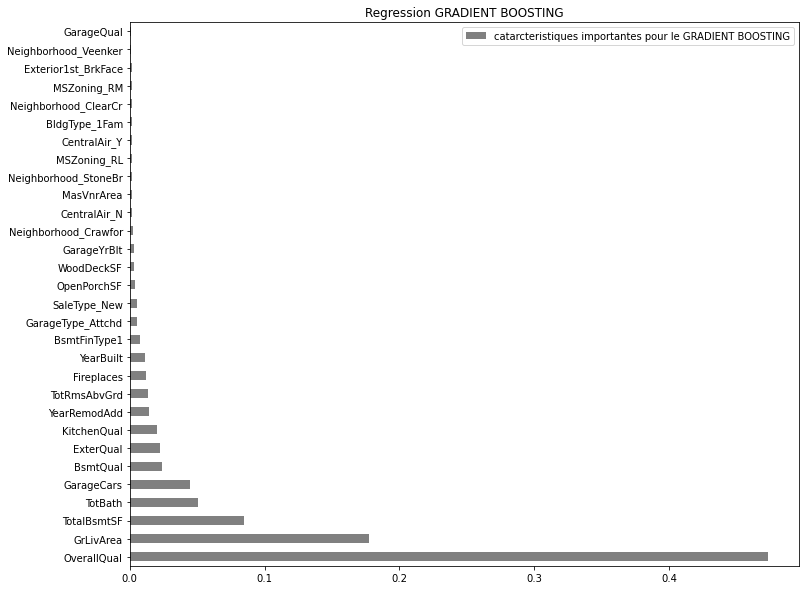

In [113]:
(df_feature_importance_GDR
 .sort_values("catarcteristiques importantes pour le GRADIENT BOOSTING", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10), color='gray')
)
plt.title("Regression GRADIENT BOOSTING")


In [92]:
meilleur_model_estimateur=meilleur_model["Transformateur"]

In [93]:
model_features_meilleur_model = get_input_features1(model_pipeline=meilleur_model, cat_step_name="cat")


Text(0.5, 1.0, ' GRADIENT BOOSTING + Transformateur')

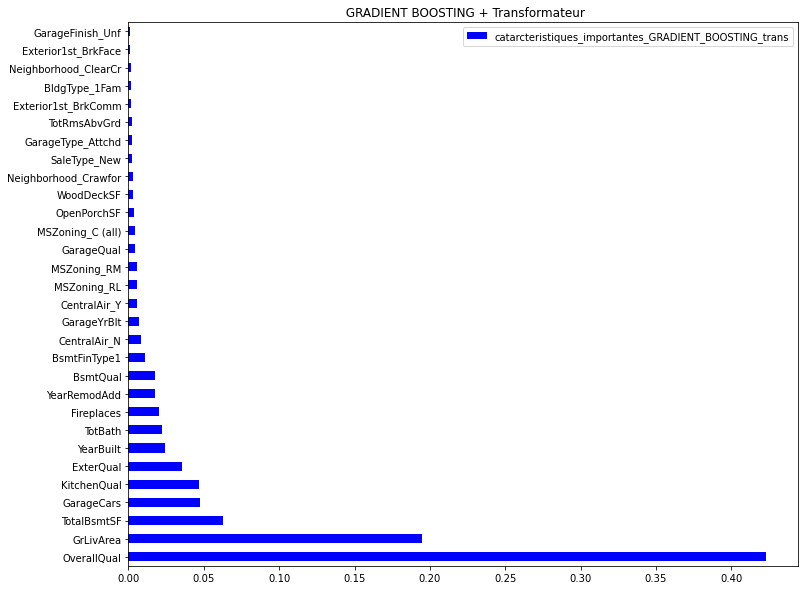

In [114]:
 df_feature_importance_meilleur_model = pd.DataFrame( meilleur_model_estimateur.regressor_.feature_importances_, columns=["catarcteristiques_importantes_GRADIENT_BOOSTING_trans"],
                                          index=model_features_meilleur_model)
(df_feature_importance_meilleur_model.sort_values("catarcteristiques_importantes_GRADIENT_BOOSTING_trans",key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10), color='blue')
)
plt.title(" GRADIENT BOOSTING + Transformateur")


# CHOIX DU MODELE

In [95]:
MODELES_2= [("Regression lineaire ",rmse_lin2),("Regression lineaire + trans ",rmse_lin_trans),
          ("RigeCV",rmse_ridge), ("RigeCV + trans",rmse_ridge_trans), 
          ("Randomforest",rmse_random),("Randomforest + trans",rmse_random_trans),
            ("GradientBoosting",rmse_GBR),("GradientBoosting + trans",rmse_GBR_trans)]

NameError: name 'rmse_ridge' is not defined

In [176]:
erreur_avec_traitement= pd.DataFrame(MODELES_2, columns=["MODELES","RMSE"])
erreur_avec_traitement

,MODELES,RMSE
0,Regression lineaire,25987.178403
1,Regression lineaire + trans,21908.030818
2,RigeCV,25837.343607
3,RigeCV + trans,21897.469688
4,Randomforest,24075.657092
5,Randomforest + trans,24258.331474
6,GradientBoosting,22777.478217
7,GradientBoosting + trans,21661.107555


<AxesSubplot:xlabel='MODELES', ylabel='RMSE'>

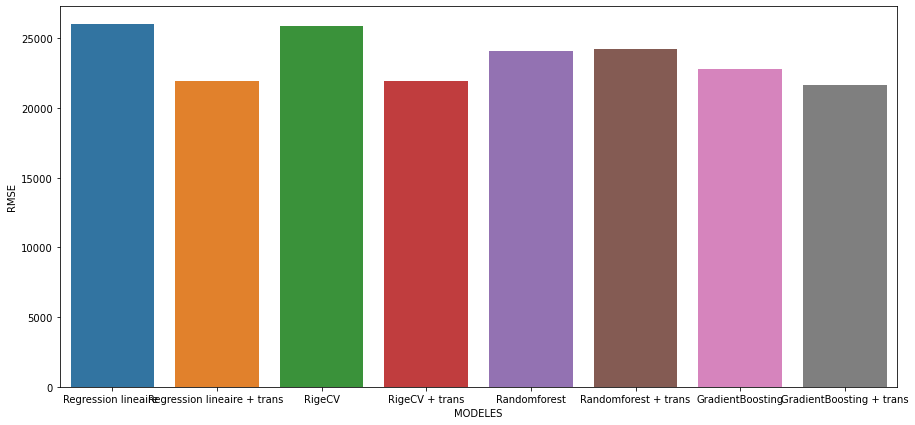

In [177]:
fig, axes = plt.subplots(figsize=(15, 7))

sns.barplot(x= 'MODELES', y= 'RMSE', data=erreur_avec_traitement, ax=axes)

In [178]:
MODELES_score_2= [("Regression lineaire ",reg_sim.score(X_test, y_test)),("Regression lineaire + trans ",reg.score(X_test, y_test)),
          ("RigeCV",reg_ridge.score(X_test, y_test)), ("RigeCV + trans",reg_ridge_trans.score(X_test, y_test)), 
          ("Randomforest",random.score(X_test, y_test)),("Randomforest + trans",random_trans.score(X_test, y_test)),
            ("GradientBoosting",GBR.score(X_test, y_test)),("GradientBoosting + trans",GBR_trans.score(X_test, y_test))
                 ]

In [179]:
Score_apres_traitement= pd.DataFrame(MODELES_score_2, columns=["MODELES_score_2","Score"])
Score_apres_traitement

,MODELES_score_2,Score
0,Regression lineaire,0.871326
1,Regression lineaire + trans,0.908551
2,RigeCV,0.872806
3,RigeCV + trans,0.908639
4,Randomforest,0.889560
5,Randomforest + trans,0.887877
6,GradientBoosting,0.901149
7,GradientBoosting + trans,0.910601


<AxesSubplot:xlabel='MODELES_score_2', ylabel='Score'>

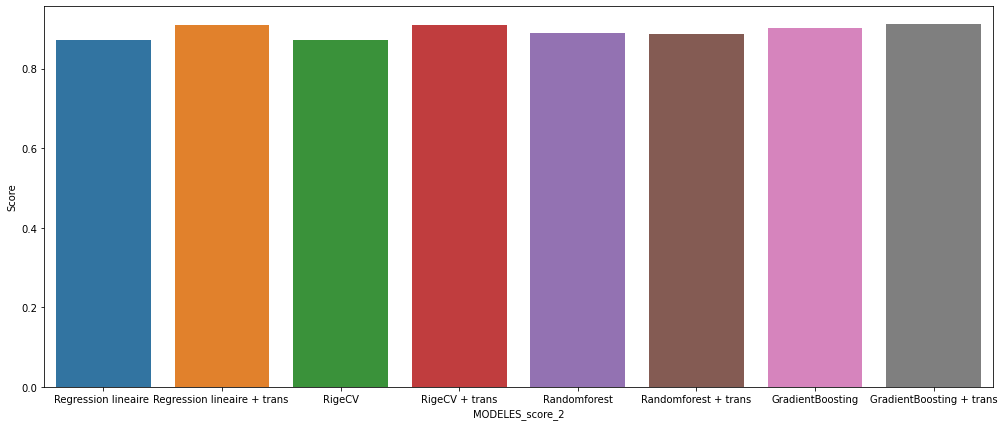

In [180]:
fig, axes = plt.subplots(figsize=(17, 7))

sns.barplot(x= 'MODELES_score_2', y= 'Score', data=Score_apres_traitement, ax=axes)

# PREDICTIONS

In [96]:
df = pd.read_csv("C:/Users/DELL/Desktop/ISE 2/Machine Learning/test.csv")

In [97]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [98]:
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] =  df.loc[:, "FireplaceQu"].fillna("No")

# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] =  df.loc[:, "LotFrontage"].fillna(0)

# GarageType etc : data description says NA for garage features is "no garage" 
df.loc[:, "GarageType"] =  df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] =  df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] =  df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] =  df.loc[:, "GarageCond"].fillna("No") 
df.loc[:, "GarageYrBlt"] =  df.loc[:, "GarageYrBlt"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement" and error for id 333 and 949
df.loc[333, "BsmtFinType2"] ="Unf"
df.loc[949, "BsmtExposure"] ="Av"
df.loc[:, "BsmtQual"] =  df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] =  df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] =  df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] =  df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] =  df.loc[:, "BsmtFinType2"].fillna("No")

# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] =  df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] =  df.loc[:, "MasVnrArea"].fillna(0)

    
# Electrical : NA most likely means not available
df.loc[:, "Electrical"] = df.loc[:, "Electrical"].fillna("SBrkr")

In [99]:
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2,"No" : 0},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [100]:
df=df.assign(TotBath= df[['FullBath','BsmtFullBath']].sum(axis=1))


In [101]:
test=df.drop(['RoofMatl','LandContour','LotConfig','Utilities','Street','LandSlope','Heating','Electrical','Functional',
              'PavedDrive','Condition2','Condition1', 'EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GarageArea','BedroomAbvGr','FullBath','BsmtFullBath','HalfBath',
              'BsmtHalfBath','KitchenAbvGr','YrSold','MoSold','ExterCond','BsmtExposure','PoolQC',
              'MiscFeature','Alley','FireplaceQu','BsmtFinType2', 'SaleCondition','Fence','MiscVal','LotShape',
              'RoofStyle','PoolArea','MSSubClass', 'BsmtFinType2','LotFrontage', 'LotArea',
               'OverallCond','BsmtCond','GarageCond'], axis=1)

In [102]:
id = test.Id

In [103]:
test = test.drop(['Id'], axis=1)

In [104]:
result =meilleur_model.predict(df)


In [105]:
PREDICTION= pd.DataFrame( { 'id': id , 'SalePrice': result} )
PREDICTION= PREDICTION[['id', 'SalePrice']]

PREDICTION.head(50)

,id,SalePrice
0,1461,115369.588150
1,1462,154110.794608
2,1463,180262.781573
3,1464,179765.961094
4,1465,198619.182500
5,1466,175125.558804
6,1467,173360.976761
7,1468,167368.178657
8,1469,180391.251183
9,1470,121139.155131


In [106]:

PREDICTION.to_csv("PREDICTION_ajustée.csv", index = False)